In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

file_path = r"C:\Users\Nagasree Kalpana M\Downloads\mental_health_burnout_data_large (1).csv"
df = pd.read_csv(file_path)

label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

X = df.drop(columns=['burnout_rate'])
y = df['burnout_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest Regression Mean Squared Error: {rf_mse*100:.4f}")


In [ ]:
#EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

file_path = r"C:\Users\Nagasree Kalpana M\Downloads\mental_health_burnout_data_large (1).csv"
df = pd.read_csv(file_path)

print(df.info())
print(df.describe())

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

df[['Age', 'Work_Hours', 'Sleep_Hours', 'Stress_Level', 'Anxiety_Level', 'Depression_Level', 'Job_Satisfaction', 'Physical_Activity (hrs/week)', 'burnout_rate']].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

corr_matrix = df[['Age', 'Work_Hours', 'Sleep_Hours', 'Stress_Level', 'Anxiety_Level', 'Depression_Level', 'Job_Satisfaction', 'Physical_Activity (hrs/week)', 'burnout_rate']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

categorical_columns = ['Stress_Level', 'Anxiety_Level', 'Depression_Level', 'Job_Satisfaction']
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
numerical_columns = ['Age', 'Work_Hours', 'Sleep_Hours', 'Stress_Level', 'Anxiety_Level', 'Depression_Level', 'Job_Satisfaction', 'Physical_Activity (hrs/week)', 'burnout_rate']
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

sns.pairplot(df[['Age', 'Work_Hours', 'Sleep_Hours', 'Stress_Level', 'Anxiety_Level', 'Depression_Level', 'Job_Satisfaction', 'Physical_Activity (hrs/week)', 'burnout_rate']])
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='burnout_rate', data=df)
plt.title('Distribution of Burnout Rate')
plt.xlabel('Burnout Rate')
plt.ylabel('Count')
plt.show()


In [ ]:
#feature engineering
from sklearn.preprocessing import StandardScaler

# 1. Handling Categorical Variables (already done with LabelEncoder)

# 2. Creating New Features
df['Sleep_to_Work_Ratio'] = df['Sleep_Hours'] / df['Work_Hours']
df['Work_Life_Balance'] = np.where(df['Sleep_to_Work_Ratio'] < 0.5, 0, 1)

# 3. Handling Missing Data
# Check for missing values
missing_values = df.isnull().sum()
if missing_values.any():
    df.fillna(df.mean(), inplace=True)

# 4. Feature Scaling (Standardization)
scaler = StandardScaler()
numerical_columns = ['Age', 'Work_Hours', 'Sleep_Hours', 'Stress_Level', 'Anxiety_Level', 'Depression_Level', 'Job_Satisfaction', 'Physical_Activity (hrs/week)', 'burnout_rate', 'Sleep_to_Work_Ratio', 'Work_Life_Balance']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Now, the dataset is ready for model training


In [34]:
#Training model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df.drop(columns=['burnout_rate'])
y = df['burnout_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred_rf = rf_regressor.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred_rf)

print(f"Random Forest Regression Mean Squared Error: {rf_mse:.4f}")


Random Forest Regression Mean Squared Error: 0.1805


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

X = df.drop(columns=['burnout_rate'])
y = df['burnout_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")

y_pred_best_rf = best_rf_model.predict(X_test)
best_rf_mse = mean_squared_error(y_test, y_pred_best_rf)
r2 = r2_score(y_test, y_pred_best_rf)

print("RandomForestRegressor")
print(f"Best Model Mean Squared Error: {best_rf_mse:.4f}")
print(f"R² (Coefficient of Determination): {r2:.4f}")


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns=['burnout_rate'])
y = df['burnout_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a very simple param grid (could be useful for demonstration or extension with Ridge/Lasso)
param_grid = {
    'fit_intercept': [True, False],
    'positive': [False, True]
}

grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_lr_model = grid_search.best_estimator_

print(f"Best Hyperparameters: {best_params}")

y_pred_best_lr = best_lr_model.predict(X_test)
best_lr_mse = mean_squared_error(y_test, y_pred_best_lr)
r2 = r2_score(y_test, y_pred_best_lr)

print("LinearRegression")
print(f"Best Model Mean Squared Error: {best_lr_mse:.4f}")
print(f"R² (Coefficient of Determination): {r2:.4f}")


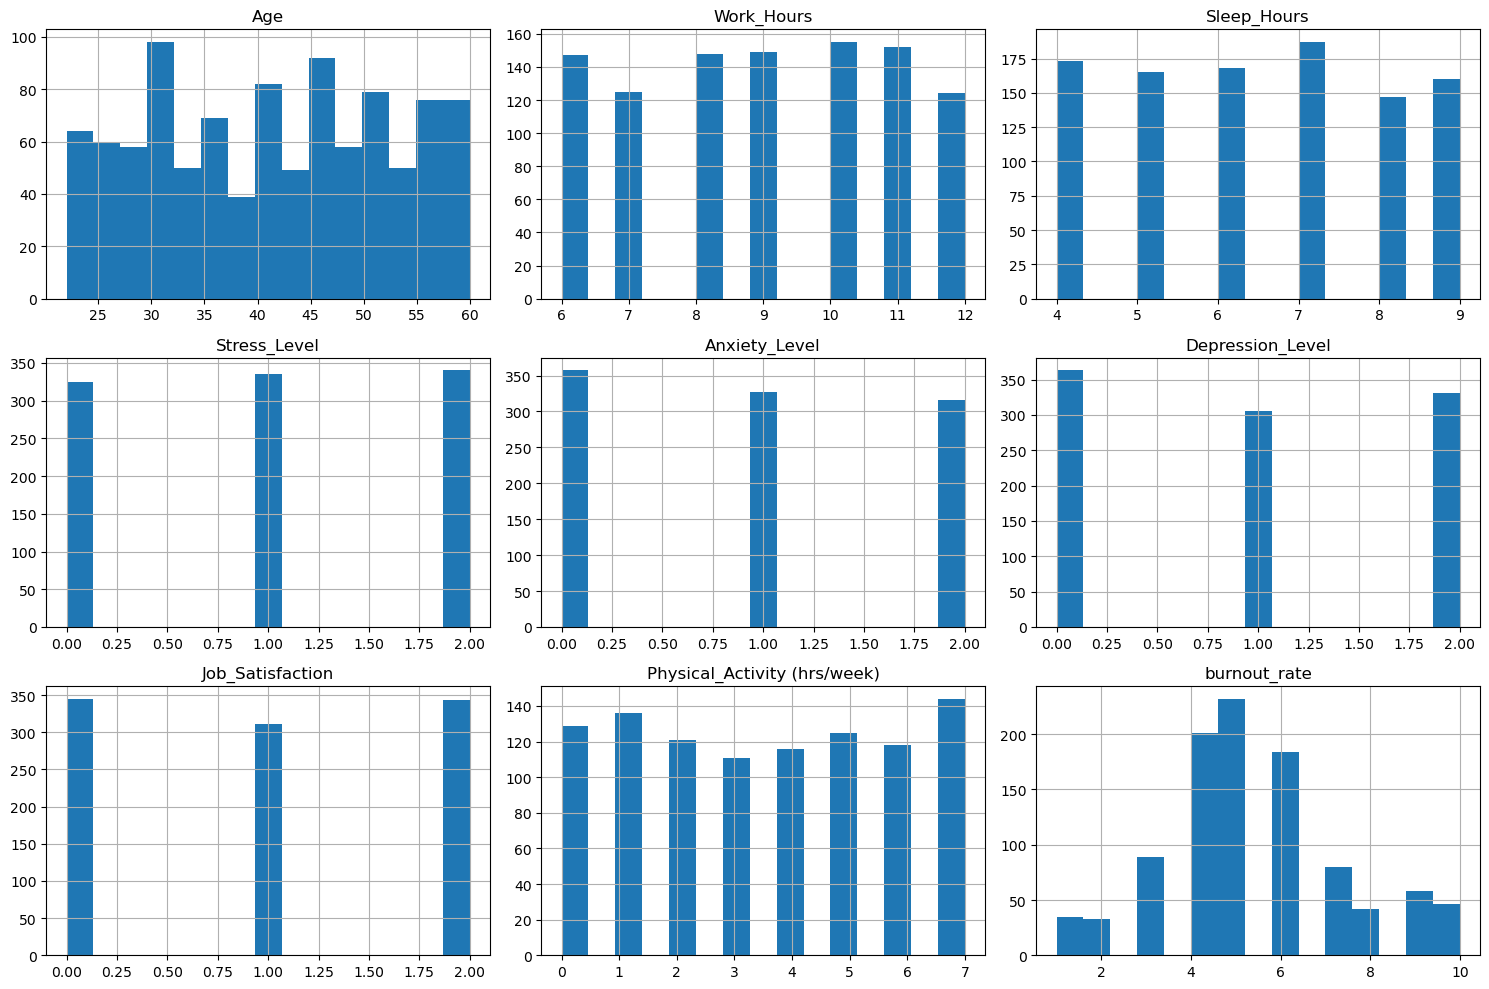

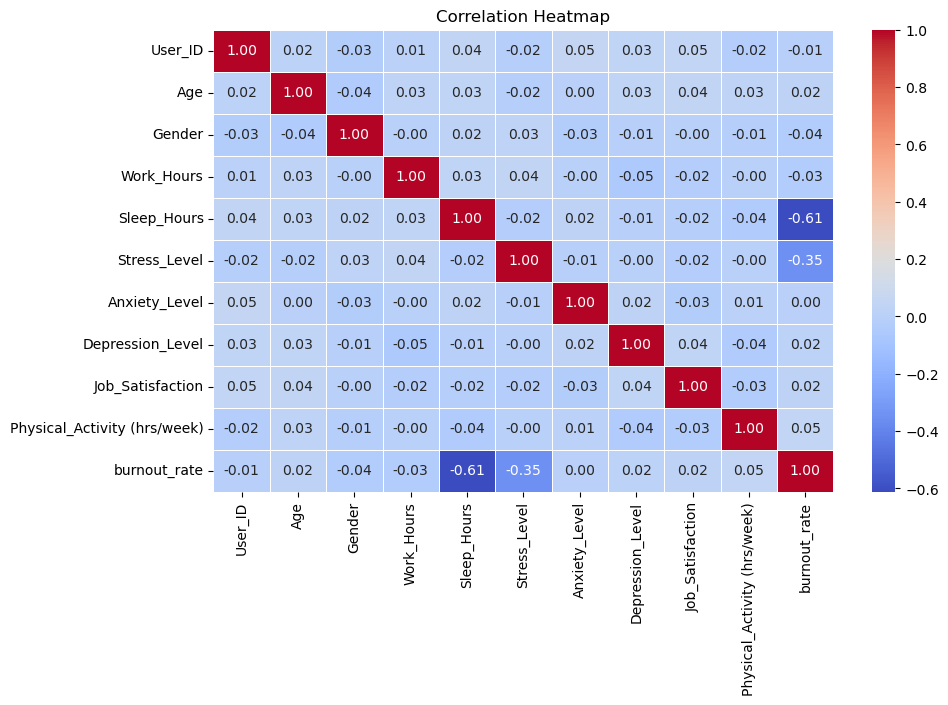

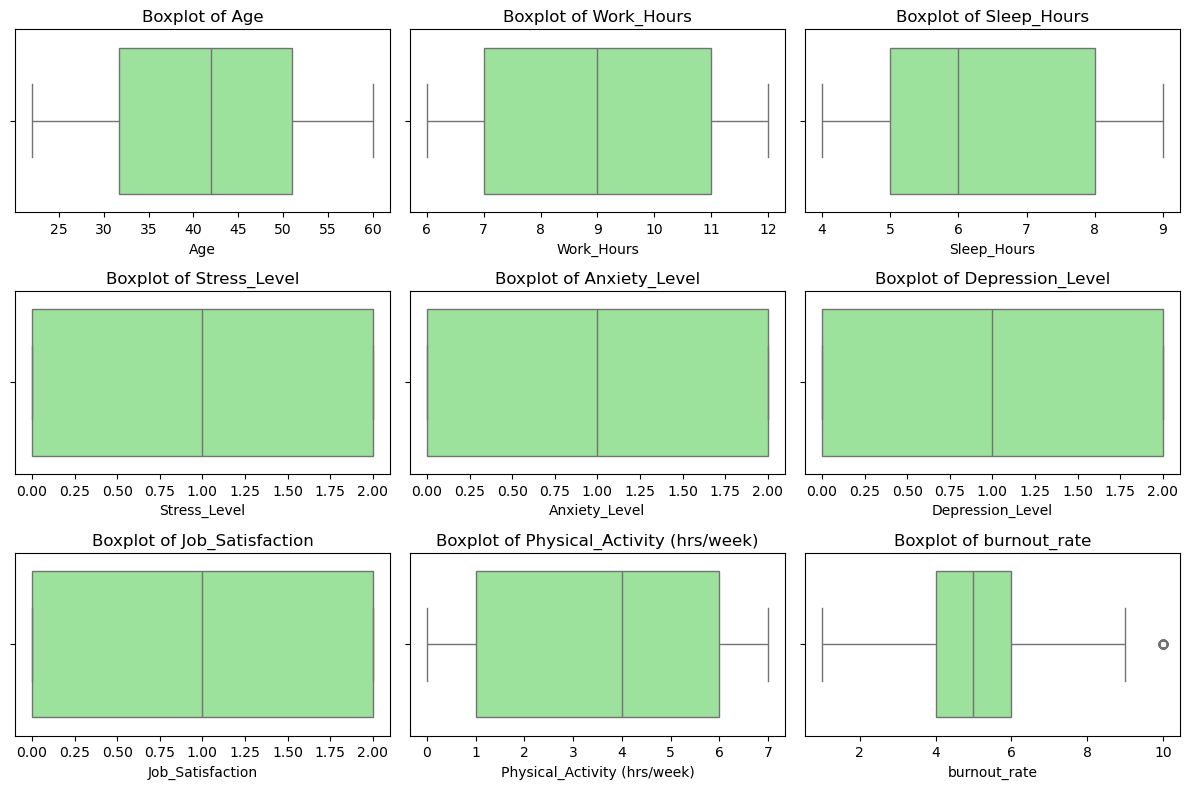

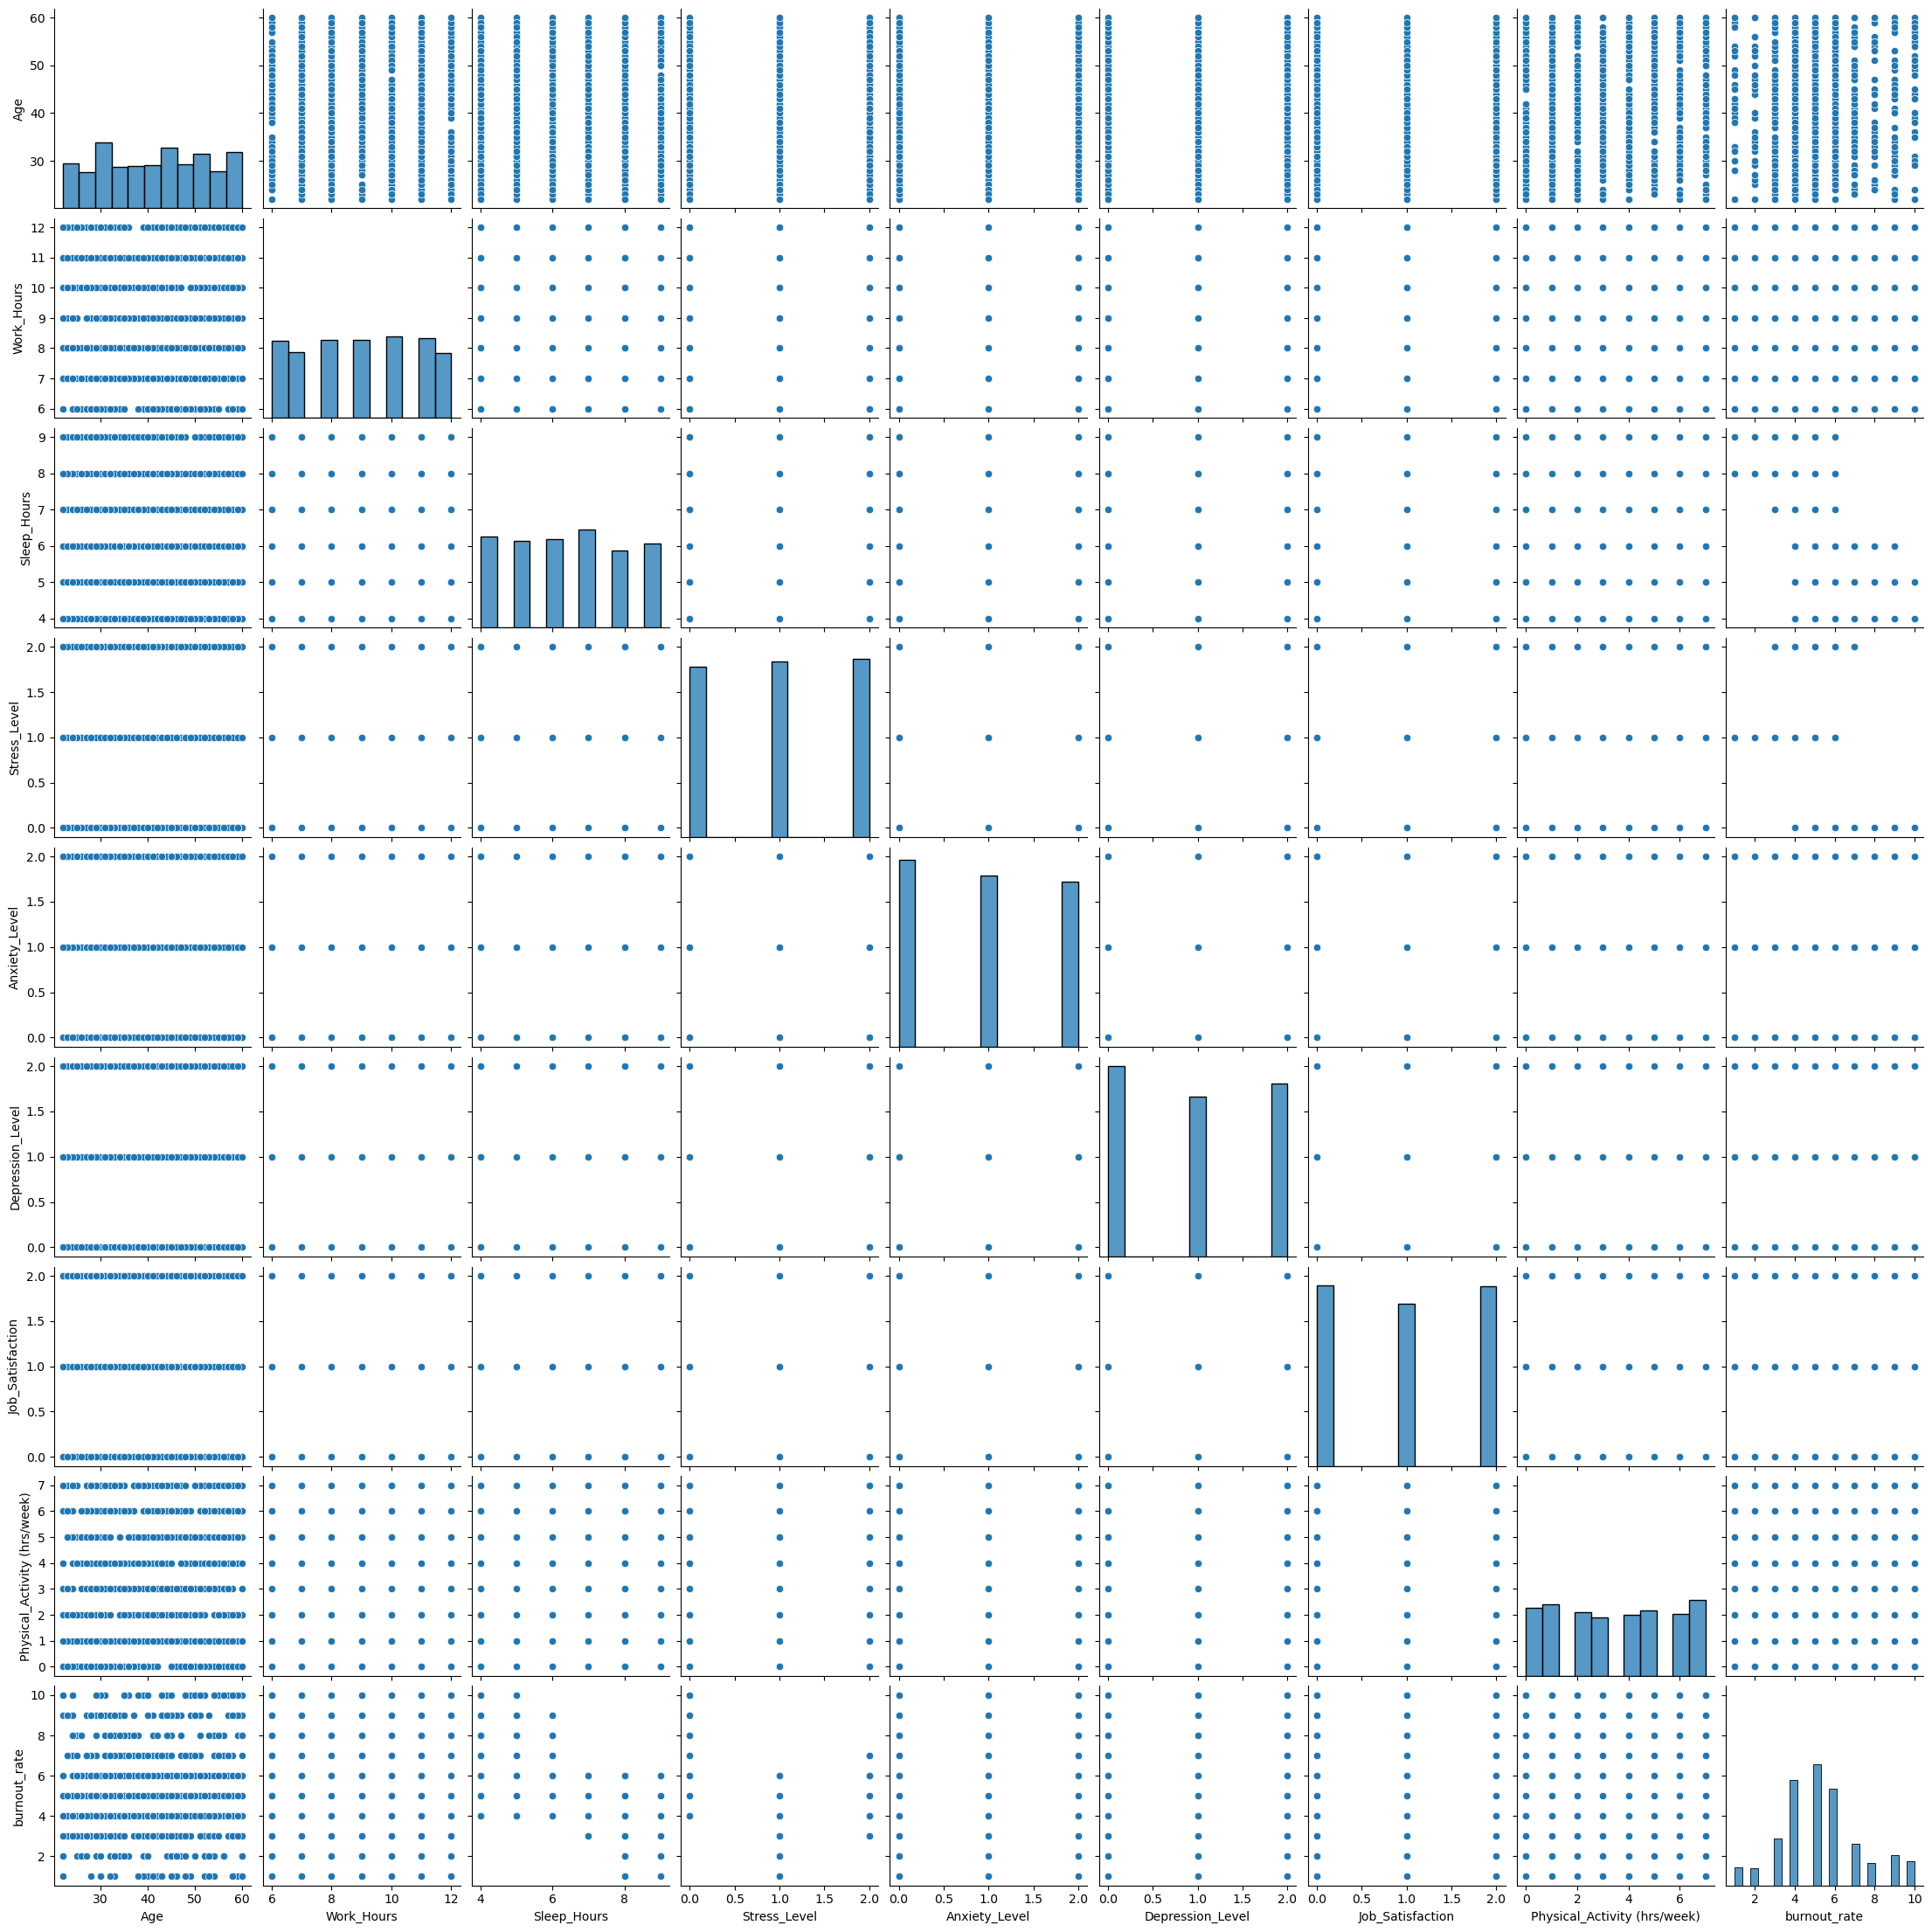

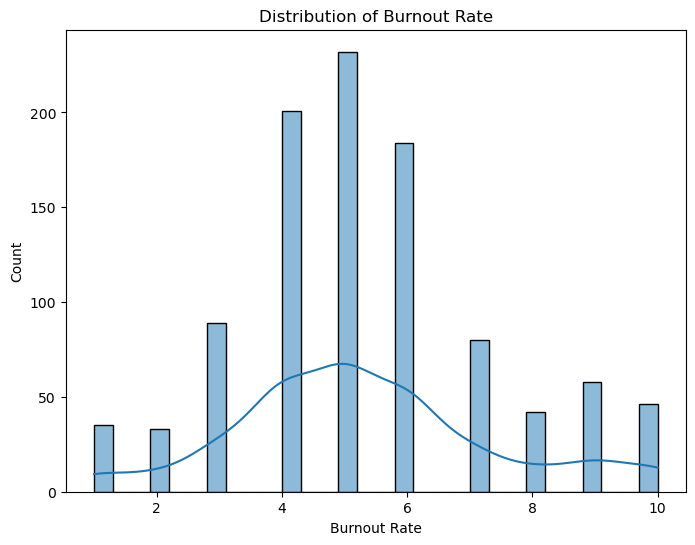

Random Forest - MSE: 0.1805, R²: 0.8239
Linear Regression - MSE: 0.5211, R²: 0.4917


C:\Users\Nagasree Kalpana M\AppData\Local\Temp\ipykernel_10064\4065826569.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mses, palette='pastel')


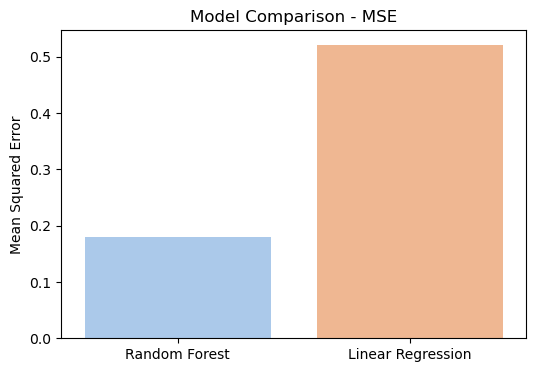

In [11]:
# Full Workflow: EDA, Feature Engineering, Model Training & Evaluation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset
file_path = r"C:\Users\Nagasree Kalpana M\Downloads\mental_health_burnout_data_large (1).csv"
df = pd.read_csv(file_path)

# Encode categorical columns
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

# EDA Visualizations
df[['Age', 'Work_Hours', 'Sleep_Hours', 'Stress_Level', 'Anxiety_Level', 'Depression_Level', 
    'Job_Satisfaction', 'Physical_Activity (hrs/week)', 'burnout_rate']].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(['Age', 'Work_Hours', 'Sleep_Hours', 'Stress_Level', 'Anxiety_Level', 
                         'Depression_Level', 'Job_Satisfaction', 'Physical_Activity (hrs/week)', 'burnout_rate'], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Pairplot
sns.pairplot(df[['Age', 'Work_Hours', 'Sleep_Hours', 'Stress_Level', 'Anxiety_Level', 
                 'Depression_Level', 'Job_Satisfaction', 'Physical_Activity (hrs/week)', 'burnout_rate']])
plt.show()

# Burnout distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['burnout_rate'], bins=30, kde=True)
plt.title('Distribution of Burnout Rate')
plt.xlabel('Burnout Rate')
plt.ylabel('Count')
plt.show()

# Feature Engineering
df['Sleep_to_Work_Ratio'] = df['Sleep_Hours'] / df['Work_Hours']
df['Work_Life_Balance'] = np.where(df['Sleep_to_Work_Ratio'] < 0.5, 0, 1)

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Feature Scaling
scaler = StandardScaler()
features = ['Age', 'Work_Hours', 'Sleep_Hours', 'Stress_Level', 'Anxiety_Level', 'Depression_Level',
            'Job_Satisfaction', 'Physical_Activity (hrs/week)', 'burnout_rate', 'Sleep_to_Work_Ratio', 'Work_Life_Balance']
df[features] = scaler.fit_transform(df[features])

# Define X, y
X = df.drop(columns=['burnout_rate'])
y = df['burnout_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest with Grid Search
rf_param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'bootstrap': [True]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5, n_jobs=-1, verbose=0)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Linear Regression with Grid Search
lr_param_grid = {
    'fit_intercept': [True, False],
    'positive': [False, True]
}
lr_grid = GridSearchCV(LinearRegression(), lr_param_grid, cv=5, n_jobs=-1, verbose=0)
lr_grid.fit(X_train, y_train)
lr_best = lr_grid.best_estimator_
lr_pred = lr_best.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

# Print Results
print(f"Random Forest - MSE: {rf_mse:.4f}, R²: {rf_r2:.4f}")
print(f"Linear Regression - MSE: {lr_mse:.4f}, R²: {lr_r2:.4f}")


C:\Users\Nagasree Kalpana M\AppData\Local\Temp\ipykernel_10064\2026400257.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mses, palette='pastel')


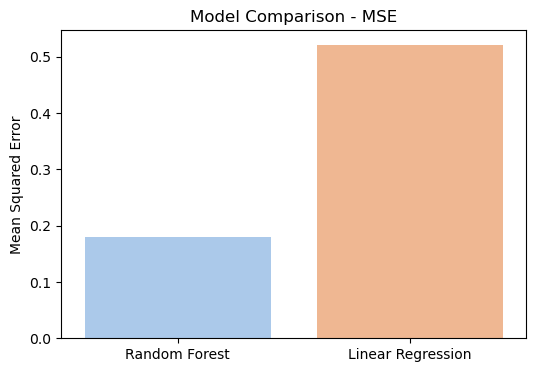

In [21]:
# MSE Comparison Plot
plt.figure(figsize=(6, 4))
models = ['Random Forest', 'Linear Regression']
mses = [rf_mse, lr_mse]
sns.barplot(x=models, y=mses, palette='pastel')
plt.title('Model Comparison - MSE')
plt.ylabel('Mean Squared Error')
plt.show()

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

file_path = r"C:\Users\Nagasree Kalpana M\Downloads\mental_health_burnout_data_large (1).csv"
df = pd.read_csv(file_path)

le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

df['Sleep_to_Work_Ratio'] = df['Sleep_Hours'] / df['Work_Hours']
df['Work_Life_Balance'] = np.where(df['Sleep_to_Work_Ratio'] < 0.5, 0, 1)
df.fillna(df.mean(), inplace=True)

numerical_columns = ['Age', 'Work_Hours', 'Sleep_Hours', 'Stress_Level', 'Anxiety_Level',
                     'Depression_Level', 'Job_Satisfaction', 'Physical_Activity (hrs/week)',
                     'Sleep_to_Work_Ratio', 'Work_Life_Balance']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

X = df[numerical_columns]
y = df['burnout_rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

def get_user_input():
    Age = float(input("Age: "))
    Work_Hours = float(input("Work Hours per week: "))
    Sleep_Hours = float(input("Sleep Hours per day: "))
    Stress_Level = int(input("Stress Level (1-10): "))
    Anxiety_Level = int(input("Anxiety Level (1-10): "))
    Depression_Level = int(input("Depression Level (1-10): "))
    Job_Satisfaction = int(input("Job Satisfaction (1-5): "))
    Physical_Activity = float(input("Physical Activity (hrs/week): "))
    Sleep_to_Work_Ratio = Sleep_Hours / Work_Hours
    Work_Life_Balance = 0 if Sleep_to_Work_Ratio < 0.5 else 1
    data = {
        'Age': [Age],
        'Work_Hours': [Work_Hours],
        'Sleep_Hours': [Sleep_Hours],
        'Stress_Level': [Stress_Level],
        'Anxiety_Level': [Anxiety_Level],
        'Depression_Level': [Depression_Level],
        'Job_Satisfaction': [Job_Satisfaction],
        'Physical_Activity (hrs/week)': [Physical_Activity],
        'Sleep_to_Work_Ratio': [Sleep_to_Work_Ratio],
        'Work_Life_Balance': [Work_Life_Balance]
    }
    return pd.DataFrame(data)

new_df = get_user_input()
new_df[numerical_columns] = scaler.transform(new_df[numerical_columns])
prediction = model.predict(new_df[numerical_columns])
print(f"Your Burnout rate is:{prediction[0]:.4f}")

Age:  25
Work Hours per week:  49
Sleep Hours per day:  6
Stress Level (1-10):  8
Anxiety Level (1-10):  9
Depression Level (1-10):  9
Job Satisfaction (1-5):  1
Physical Activity (hrs/week):  4


Your Burnout rate is:5.7600
